
# CODE TO PREDICT ACCEPTANCE CHANCE OF UNIVERSITY ADMISSION
# Dr. Ryan Ahmed @STEMplicity
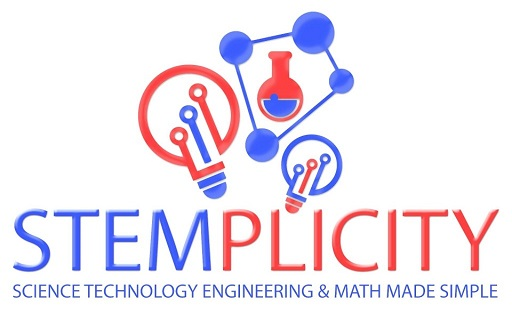



# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# STEP #0: IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
admission_df = pd.read_csv('Admission.csv')

In [3]:
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
392,393,326,112,4,4.0,3.5,9.12,1,0.84
393,394,317,104,2,3.0,3.0,8.76,0,0.77
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# STEP #2: VISUALIZE DATASET

In [7]:
admission_df = admission_df.drop(['Serial No.'], axis = 1)

In [8]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [9]:
column_headers = admission_df.columns.values

In [10]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

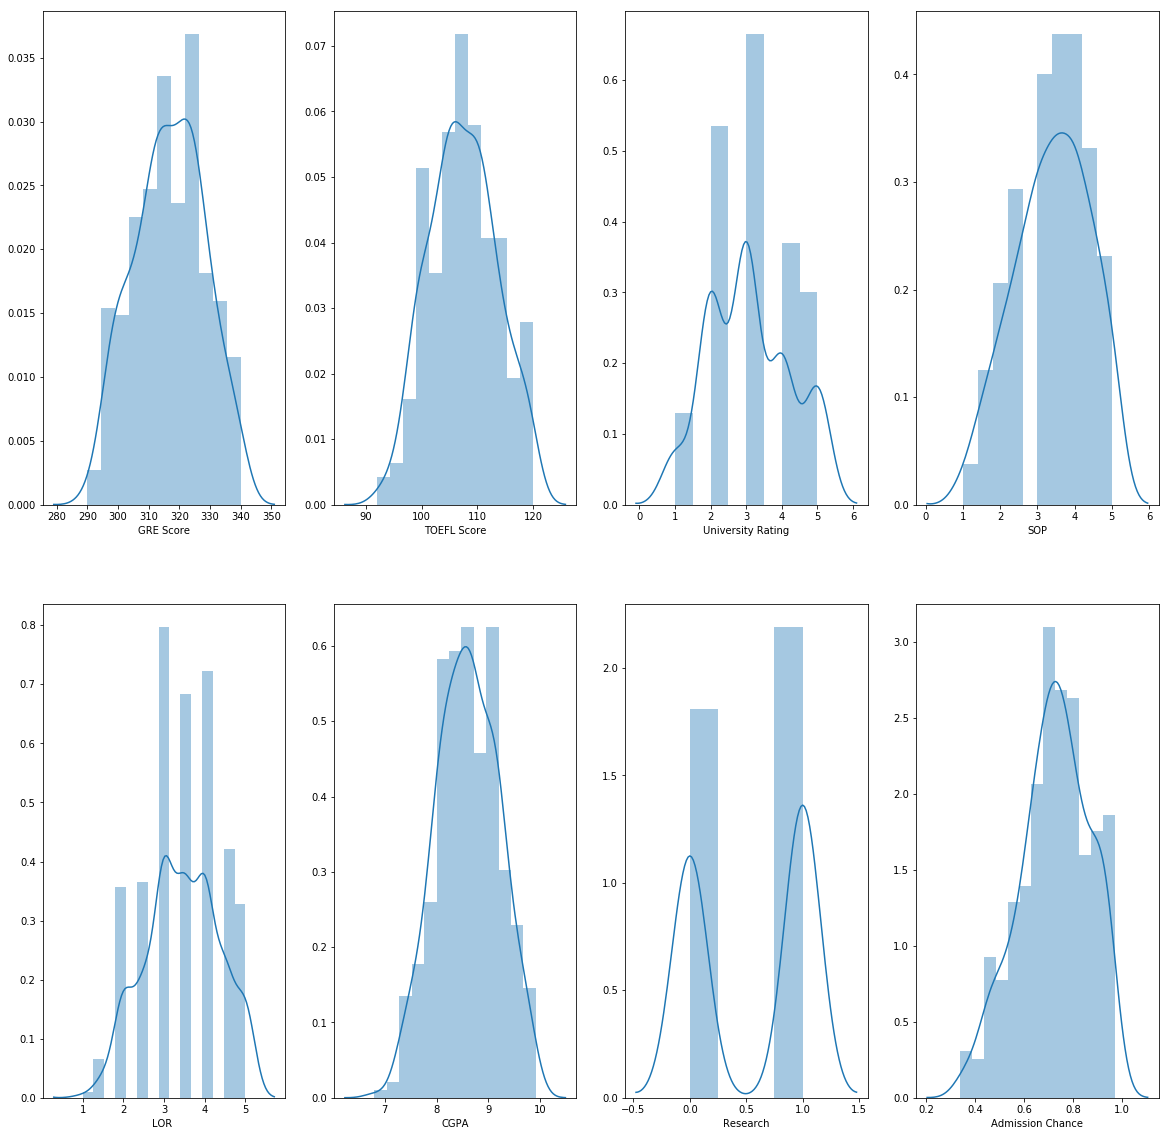

In [11]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(admission_df[column_header])
    i = i + 1


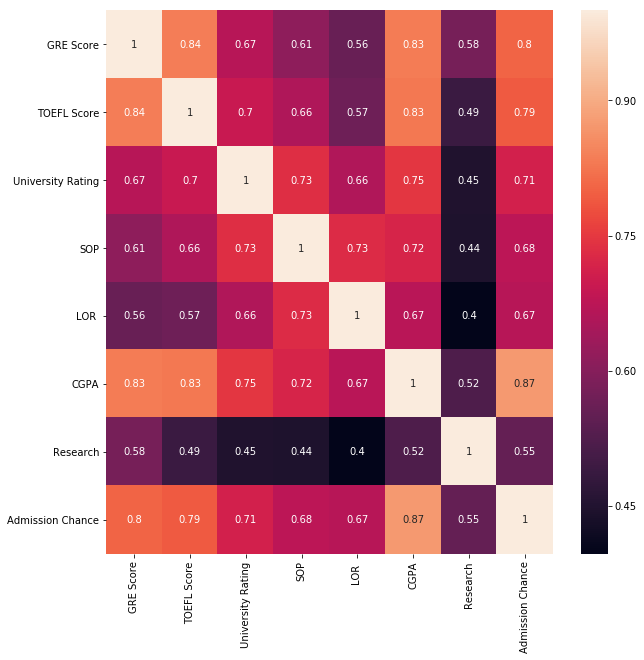

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot = True)

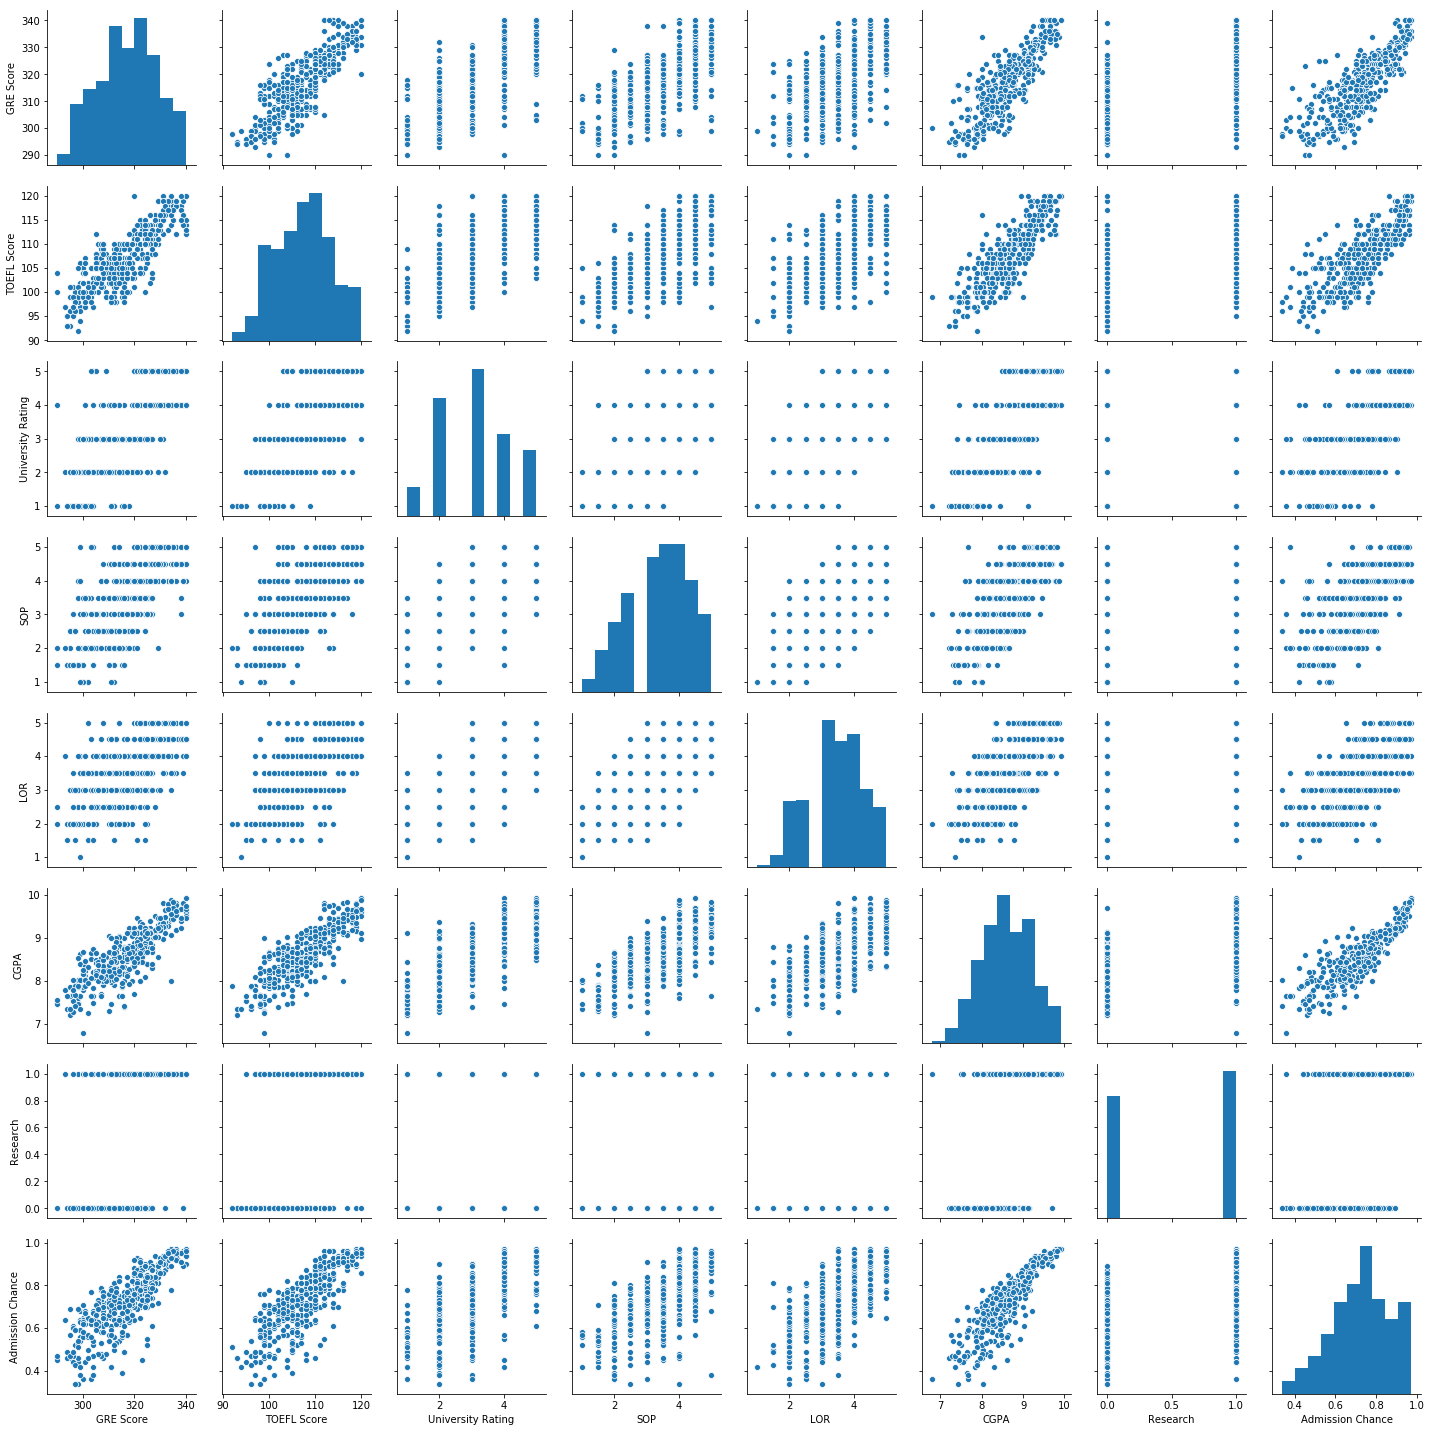

In [13]:
sns.pairplot(admission_df)

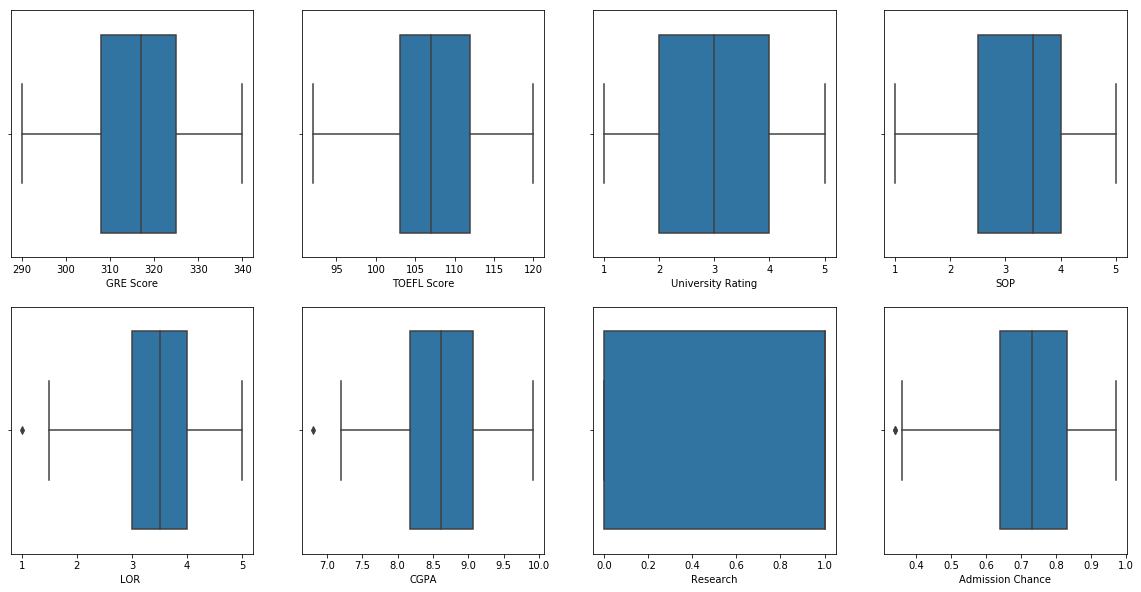

In [15]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(admission_df[column_header])
    i = i + 1


# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

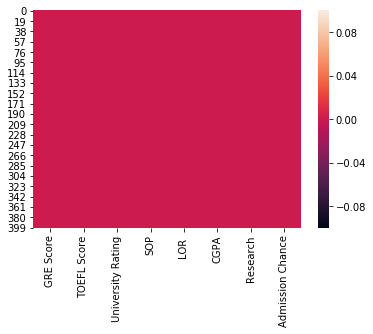

In [16]:
sns.heatmap(admission_df.isnull())

In [17]:
X = admission_df.drop(['Admission Chance'], axis = 1)

In [18]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [19]:
y = admission_df['Admission Chance']

In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
370    0.72
371    0.89
372    0.95
373    0.79
374    0.39
375    0.38
376    0.34
377    0.47
378    0.56
379    0.71
380    0.78
381    0.73
382    0.82
383    0.62
384    0.96
385    0.96
386    0.46
387    0.53
388    0.49
389    0.76
390    0.64
391    0.71
392    0.84
393    0.77
394    0.89
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train.shape

(320, 7)

In [23]:
X_test.shape

(80, 7)

# STEP #4: TRAINING THE MODEL

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)


Linear Model Coeff (m) [ 0.00182934  0.00264915  0.00557509 -0.00025733  0.02125271  0.12610349
  0.0176724 ]
Linear Model Coeff (b) -1.3252540092853387


# STEP #5: EVALUATING THE MODEL 

In [40]:
y_predict = regressor.predict(X_test)

Text(0.5,0,'True (ground truth)')

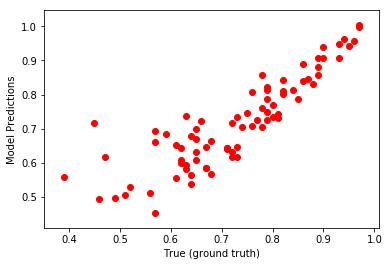

In [41]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

In [43]:
k 

7

In [44]:
n

80

In [45]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 0.067 
MSE = 0.004510922165564735 
MAE = 0.050929671418159364 
R2 = 0.7477104063946121 
Adjusted R2 = 0.7231822514607549 
Mean Absolute Percentage Error = 7.9301531803655205 %


# STEP #6 RETRAIN AND VISUALIZE THE RESULTS

In [47]:
X = admission_df[[ 'GRE Score', 'TOEFL Score' ]]
y = admission_df['Admission Chance']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_predict = regressor.predict(X_test)

Text(0.5,0,'True (ground truth)')

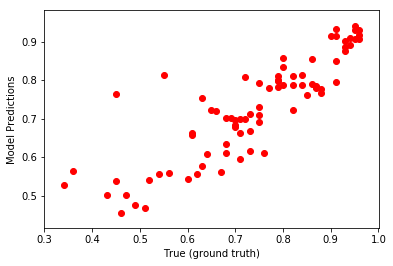

In [51]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 



RMSE = 0.079 
MSE = 0.006295382308791198 
MAE = 0.05672799469525327 
R2 = 0.739735043158908 
Adjusted R2 = 0.7329749144097888 
Mean Absolute Percentage Error = 8.967301515719434 %


In [57]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(admission_df['GRE Score'].min(), admission_df['GRE Score'].max(), 100)  , np.linspace(admission_df['TOEFL Score'].min(), admission_df['TOEFL Score'].max(), 100)  )
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score':y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5,0,'Acceptance Chance')

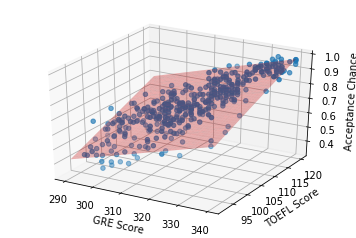

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(admission_df['GRE Score'], admission_df['TOEFL Score'], admission_df['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fittedY, color = 'r', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance')

# EXCELLENT JOB! KEEP UP THE GREAT WORK!